# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [2]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model, set_random_seed
from torchviz import make_dot

# Additional required imports 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, schedules
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.config.experimental import enable_op_determinism

from mlxtend.plotting import plot_decision_regions

set_random_seed(42) # Set a random seed for reproducibility
enable_op_determinism() # Configures TensorFlow ops to run deterministically.

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [4]:
train.head(10)

,x0,x1,y,split
0,0.377044,0.587023,0.0,train
1,-1.222865,1.514124,1.0,train
2,-0.036282,-1.562136,0.0,train
3,-1.217459,0.151372,1.0,train
4,0.072188,0.503239,0.0,train
5,-0.603149,1.066878,1.0,train
6,-0.666947,-1.929020,0.0,train
7,1.668004,0.210831,0.0,train
8,-3.357624,-0.899256,1.0,train
9,1.439053,-1.670215,1.0,train


In [5]:
test.head(10)

,x0,x1,y,split
500,0.026437,-0.776630,1.0,test
501,-0.842627,-0.856830,0.0,test
502,1.447394,0.776105,0.0,test
503,1.328300,-1.439170,0.0,test
504,0.157283,0.900862,0.0,test
505,0.334879,1.248632,0.0,test
506,0.288895,0.227737,0.0,test
507,-2.022506,2.596758,1.0,test
508,-1.596756,-0.132547,0.0,test
509,1.257880,0.011241,0.0,test


In [6]:
X_train = train.drop(['y', 'split'], axis=1)
X_test = test.drop(['y', 'split'], axis=1)
y_train = pd.DataFrame(train['y']).astype(int).to_numpy() # to_numpy array for Keras
y_test =  pd.DataFrame(test['y']).astype(int).to_numpy()


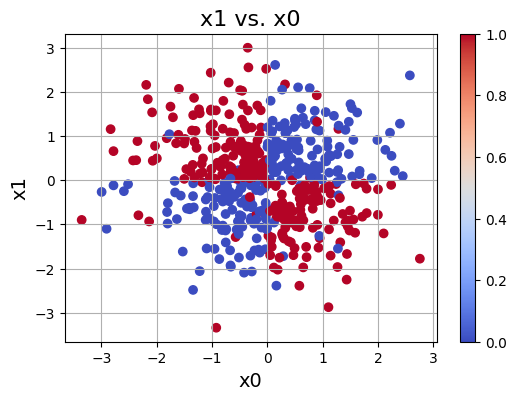

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()


### MLP architecture without cosine decay 

In [8]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) #without cosine decay
model.fit(X_train, y_train,epochs=100, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
results = model.evaluate(X_test, y_test)
print("Accuracy without cosine decay: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9031 - loss: 0.2995
Accuracy without cosine decay:  0.9139999747276306


### MLP architecture with cosine decay

In [10]:
# Define the model architecture
def modelArchCosine(init_learn_rate, decay_steps, warmup_taget, warmup_steps):
    model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
    ])
    cosine_decay= schedules.CosineDecay(init_learn_rate, decay_steps, warmup_target=warmup_taget, warmup_steps=warmup_steps)
    opt = Adam(cosine_decay)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
    model.fit(X_train, y_train,epochs=100, verbose=0)
    return model


In [11]:
model = modelArchCosine(0.001, 1000, 0.1, 1000)
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay: ", results[1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8742 - loss: 0.3360
Accuracy with cosine decay:  0.8920000195503235


We have a reduced accuracy with the current Cosine decay params: 0.001, 1000, 0.1, 1000

In [12]:
model = modelArchCosine(0.0001, 1000, 0.1, 1000) #redused initial learning rate from 0.001 to 0.0001
results = model.evaluate(X_test, y_test)

print("Accuracy with cosine decay: ", results[1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8728 - loss: 0.4284
Accuracy with cosine decay:  0.8820000290870667


The reduces learning rate did nothing to improve the accuracy

In [13]:
model = modelArchCosine(0.001, 1000, 0.01, 1000) #Reducing warmup_target instead from 0.1 to 0.01
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay: ", results[1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9275 - loss: 0.3073
Accuracy with cosine decay:  0.9300000071525574


A reduction in warmup_target improved the accuracy significantly. Note that the accuracy is over the required theshold of 0.93

In [14]:
# Define the model architecture
def modelArchCosine_regulation(init_learn_rate, decay_steps, warmup_taget, warmup_steps):
    model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dense(1, activation='sigmoid', kernel_regularizer='l2')  # Binary output
    ])
    cosine_decay= schedules.CosineDecay(init_learn_rate, decay_steps, warmup_target=warmup_taget, warmup_steps=warmup_steps)
    opt = Adam(cosine_decay)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
    model.fit(X_train, y_train,epochs=100, verbose=0)
    return model

In [15]:
model = modelArchCosine_regulation(0.001, 1000, 0.01, 1000) 
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay: ", results[1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9076 - loss: 0.5253
Accuracy with cosine decay:  0.9179999828338623


Regulation reduced the overall performance on accuracy.

#### Hence, by using model = modelArchCosine(0.001, 1000, 0.01, 1000) and without regulation we achived the requirement of accuracy > 0.93

### 3a.
To ensure reproducibility, I set a random seed for TensorFlow. By setting these seeds, we ensure that every time the script runs, it produces the same results (assuming no other sources of randomness involved).

### 3b.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


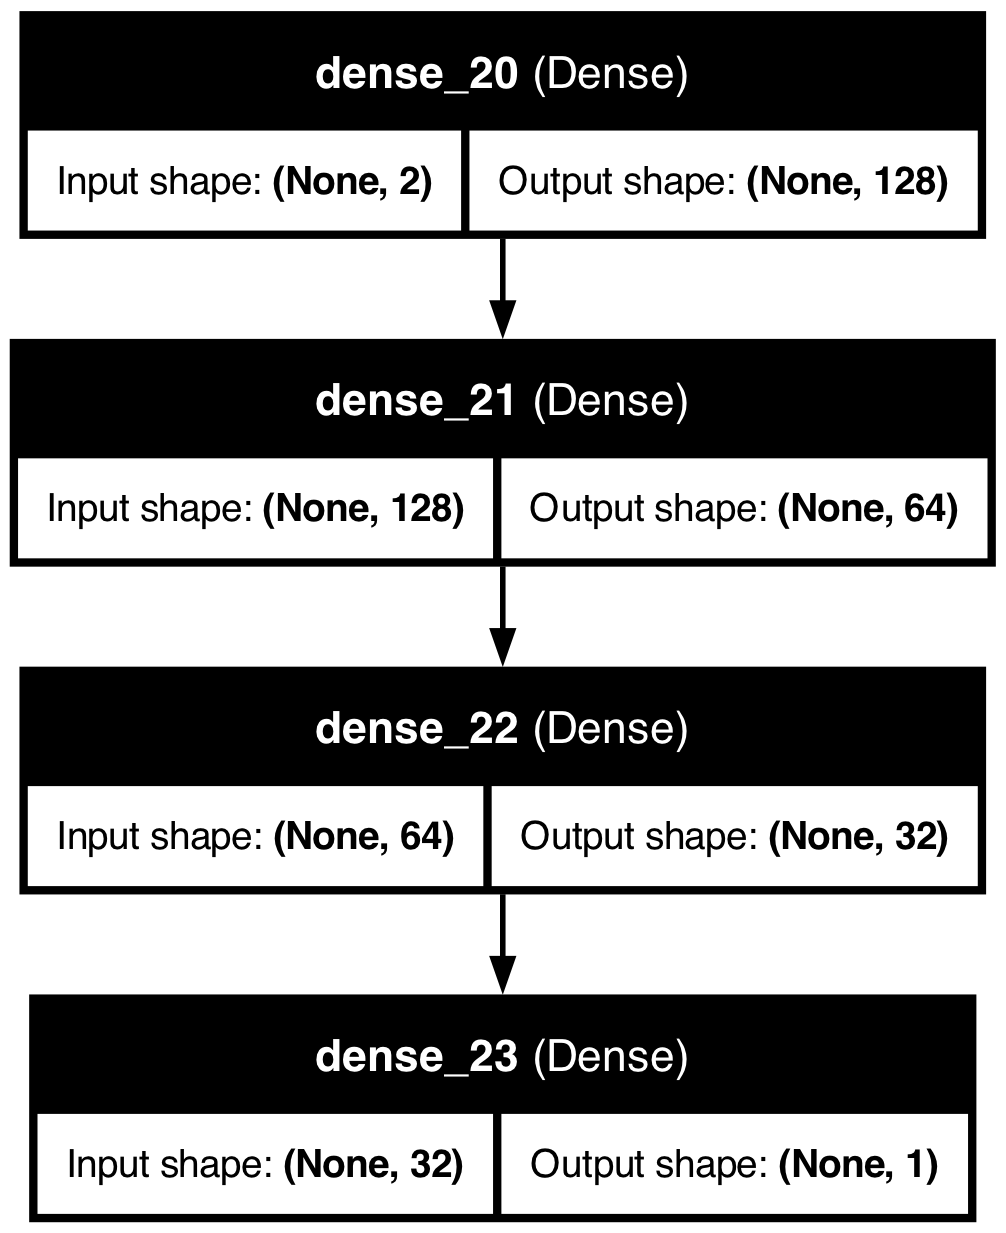

In [16]:
model = modelArchCosine(0.001, 1000, 0.01, 1000) 
plot_model(model, to_file='model_arch.png', show_shapes=True, show_layer_names=True)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 225us/step


<Axes: >

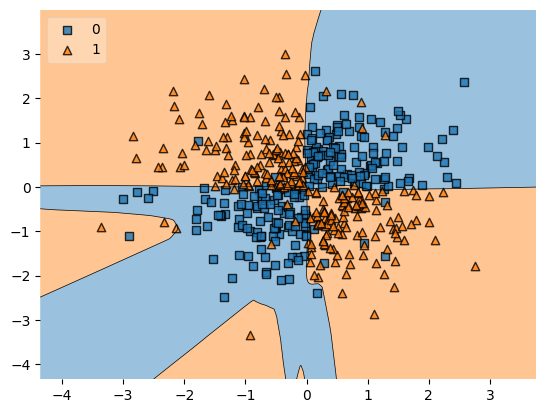

In [17]:
plot_decision_regions(X=X_train.to_numpy(), y=y_train.reshape(-1), clf=model, legend=2)

The decision boundary is complex and non-linear, indicating that the neural network (MLP) has learned a non-linear decision surface to separate the two classes.
However, the plot shows that the boundary is relatively jagged, which may suggest overfitting, especially in regions with low data density where the boundary fluctuates.

### 3c
SGD updates weights based on the gradient of the loss function for each batch and requires careful tuning of the learning rate. It can struggle with local minima or saddle points, especially with a fixed learning rate.

Adam combines (which accelerates gradient vectors in the right direction) and RMSProp (which adapts the learning rate for each parameter based on the historical squared gradients), allowing it to adapt the learning rate during training. This leads to faster convergence and better handling of sparse gradients and non-convex problems, generally requiring less hyperparameter tuning than SGD.

Adam is easy to use as it performs well across a wide range of tasks without requiring extensive learning rate tuning. Its adaptive learning rate allows for faster convergence compared to SGD, making it more efficient, particularly when training deep neural networks.

### 3d.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9128 - loss: 0.3158
Accuracy with low warmup and cosine decay:  0.9179999828338623


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8806 - loss: 0.3006
Accuracy with high warmup and cosine decay:  0.8939999938011169


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8933 - loss: 0.2892
Accuracy with base Adam optimizer:  0.9100000262260437


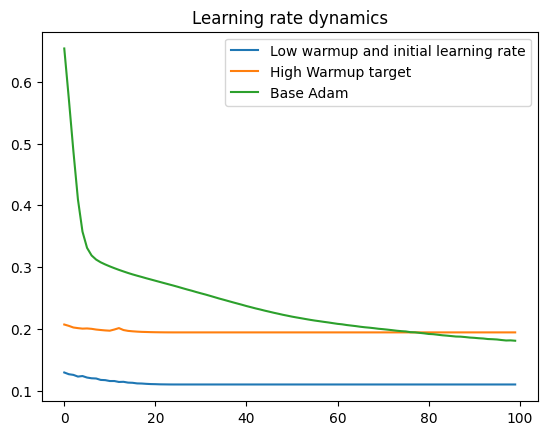

In [18]:
# Experiment 1: Low Warmup Target
model_low_warmup = modelArchCosine(init_learn_rate=0.001, decay_steps=1000, warmup_taget=0.01, warmup_steps=1000)
history_low_warmup = model_low_warmup.fit(X_train, y_train, epochs=100, verbose=0)
results_low_warmup = model_low_warmup.evaluate(X_test, y_test)
print("Accuracy with low warmup and cosine decay: ", results_low_warmup[1])

# Experiment 2: High Warmup Target
model_high_warmup = modelArchCosine(init_learn_rate=0.001, decay_steps=1000, warmup_taget=0.1, warmup_steps=1000)
history_high_warmup = model_high_warmup.fit(X_train, y_train, epochs=100, verbose=0)
results_high_warmup = model_high_warmup.evaluate(X_test, y_test)
print("Accuracy with high warmup and cosine decay: ", results_high_warmup[1])

# Experiment 3: Base Adam without Cosine Decay (for comparison)
model_adam_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model_adam_base.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history_adam_base = model_adam_base.fit(X_train, y_train, epochs=100, verbose=0)
results_adam_base = model_adam_base.evaluate(X_test, y_test)
print("Accuracy with base Adam optimizer: ", results_adam_base[1])

# Plotting the training loss for the three experiments
loss_low_warmup = history_low_warmup.history['loss']
loss_high_warmup = history_high_warmup.history['loss']
loss_adam_base = history_adam_base.history['loss']
epochs = range(100)

plt.plot(epochs, loss_low_warmup, label='Low warmup and initial learning rate')
plt.plot(epochs, loss_high_warmup, label='High Warmup target')
plt.plot(epochs, loss_adam_base, label='Base Adam')
plt.title('Learning rate dynamics')
plt.legend()
plt.show()

From the plot, we can observe some unusual learning rate dynamics, particularly with the high and low warmup target configurations. The Base adam seems to provide a more stable decrease in loss, although it flattens out earlier than expected. The high and  low warmup target, however, shows minimal improvement, indicating that the learning rate may not have been tuned effectively after the warmup phase. Overall, while manual scheduling does improve stability, fine-tuning the parameters is crucial to avoid plateauing and maximize performance gains

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [19]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [20]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [21]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


In [22]:
data.dtypes

ID         int64
0        float64
1        float64
2        float64
3        float64
          ...   
16379    float64
16380    float64
16381    float64
16382    float64
16383    float64
Length: 16385, dtype: object

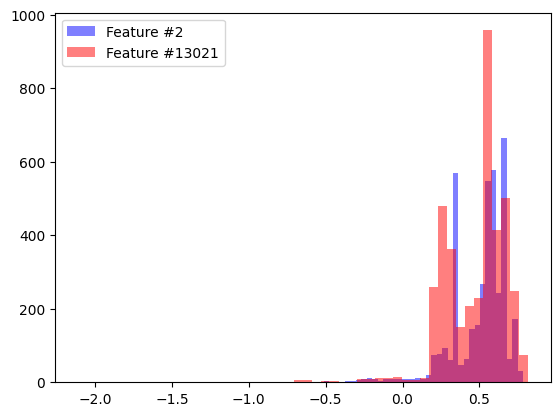

In [23]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

### Necessary imports

In [24]:
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# Load the unsupervised dataset and skip the first row, assign new index as 'ID'
data_df = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
data_df.reset_index(drop=False, inplace=True)
data_df.rename(columns={'index':'ID'}, inplace=True)

# First row of the CSV file likely contains hidden or obfuscated information, extract metadata from the first row
hidden_data = pd.read_csv('unsupervised_data.csv',nrows=1).columns.to_numpy()

In [26]:
# Extract and convert column identifiers
decoded_columns = [int(col.split('col_')[1]) for col in hidden_data]
decoded_data = data_df.loc[:, decoded_columns]

sample = data_df.iloc[0, 1:].to_numpy().reshape(128, 128)

# Initialize an empty DataFrame for reshaped samples
reshaped_data_df = pd.DataFrame(columns=["sample"])

for index in range(len(data_df[0])):
    reshaped_sample = data_df.iloc[index, 1:].to_numpy().reshape(128, 128, 1)
    reshaped_data_df.at[index, "sample"] = np.rad2deg(reshaped_sample)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


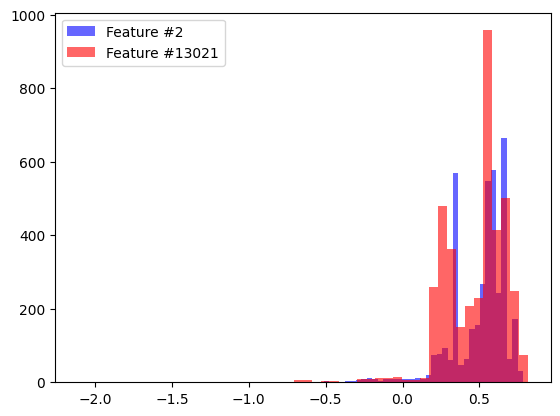

In [27]:
# Sum of rows
row_totals = decoded_data.sum(axis=1)

# General info of the dataset
data_df.info()

# Plot histograms for two selected features
plt.hist(data_df.iloc[:, 2], bins=50, color='blue', alpha=0.6, label='Feature #2')
plt.hist(data_df.iloc[:, 13021], bins=50, color='red', alpha=0.6, label='Feature #13021')
plt.legend()
plt.show()

## Dimensionality reduction

### PCA
A linear reduction technique that reduces the dataset to its most essential features, allowing easier visualization and faster clustering.

In [28]:
pca_80 = PCA(0.8).fit_transform(data_df.iloc[:, 1:])
pca_90 = PCA(0.9).fit_transform(data_df.iloc[:, 1:])

### t-SNE
t-SNE compresses the data into 2 or 3 dimensions

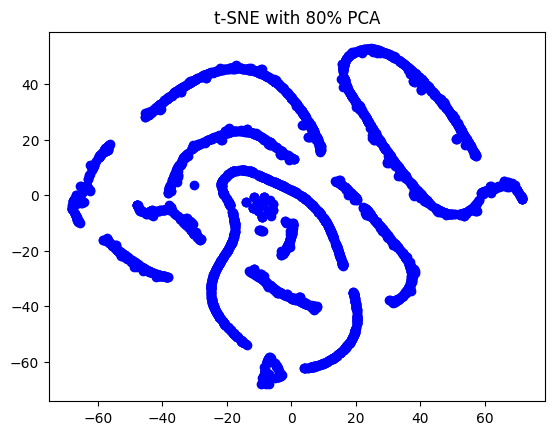

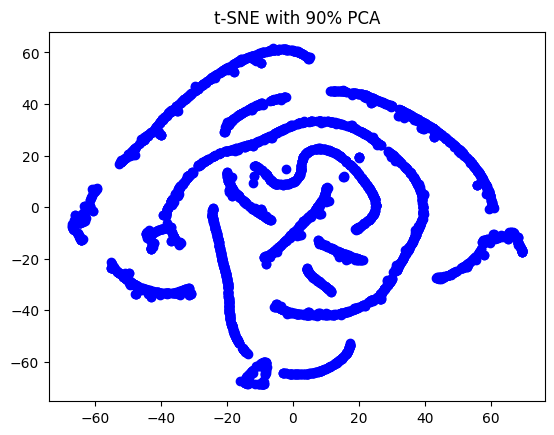

In [29]:
tsne_80 = TSNE(n_components=2, perplexity=40, random_state=42, n_jobs=-1)
tsne_results_80 = tsne_80.fit_transform(pca_80)
plt.scatter(tsne_results_80[:, 0], tsne_results_80[:, 1], c='blue')
plt.title('t-SNE with 80% PCA')
plt.show()

tsne_90 = TSNE(n_components=2, perplexity=40, random_state=42, n_jobs=-1)
tsne_results_90 = tsne_90.fit_transform(pca_90)
plt.scatter(tsne_results_90[:, 0], tsne_results_90[:, 1], c='blue')
plt.title('t-SNE with 90% PCA')
plt.show()

### UMAP
A non-linear dimensionality reduction method that preserves both local and global structures of the data.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


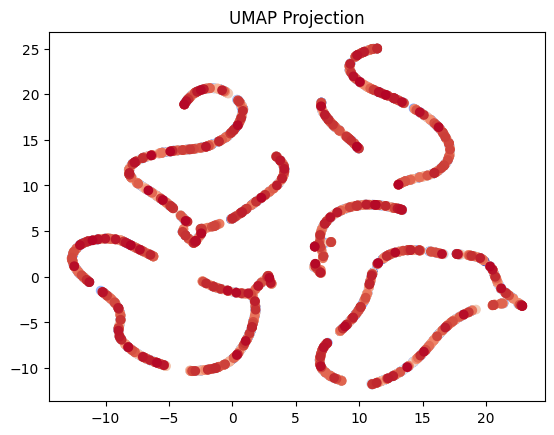

In [30]:
umap_reduced = umap.UMAP(random_state = 42)
umap_transformed = umap_reduced.fit_transform(data_df.iloc[:, 1:])

plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=data_df.iloc[:, 0], cmap='coolwarm')
plt.title('UMAP Projection')
plt.show()

## Clustering

### DBSCAN

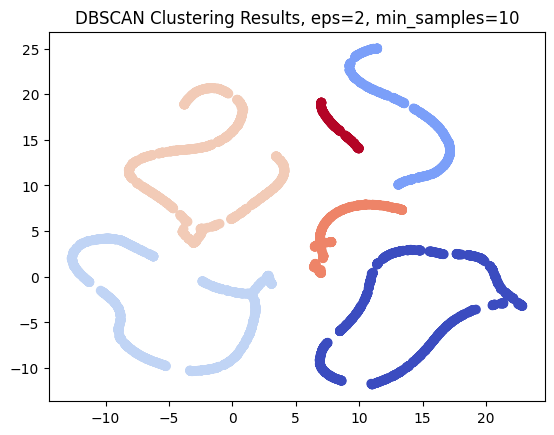

In [31]:
dbscan_cluster = DBSCAN(eps=2, min_samples=10)
dbscan_labels = dbscan_cluster.fit_predict(umap_transformed)
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=2, min_samples=10')
plt.show()

Accuracy: 0.87325

eps=2, min_samples=10

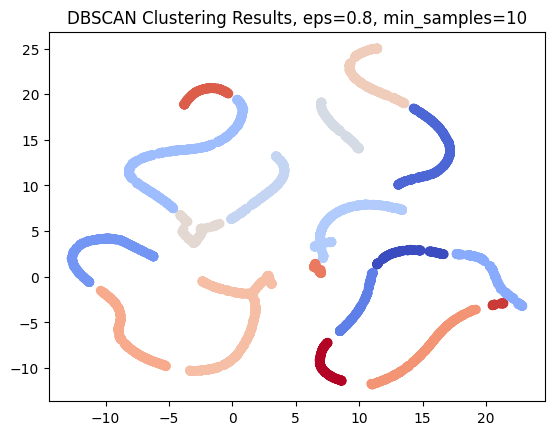

In [32]:
dbscan_cluster = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan_cluster.fit_predict(umap_transformed)
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=0.8, min_samples=10')
plt.show()

Accuracy: 0.36900

eps=0.8, min_samples=10

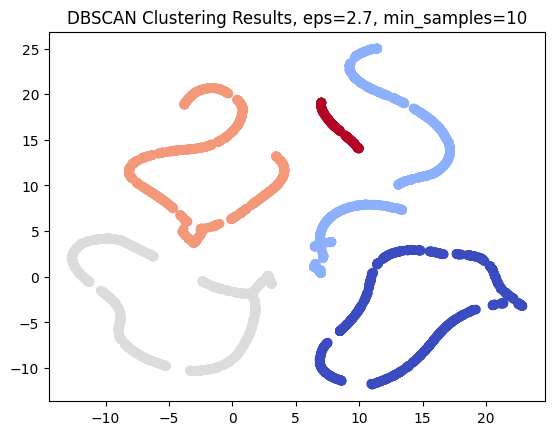

In [33]:
dbscan_cluster = DBSCAN(eps=2.7, min_samples=10)
dbscan_labels = dbscan_cluster.fit_predict(umap_transformed)
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=2.7, min_samples=10')
plt.show()

Accuracy: 0.95950

eps=2.7, min_samples=10

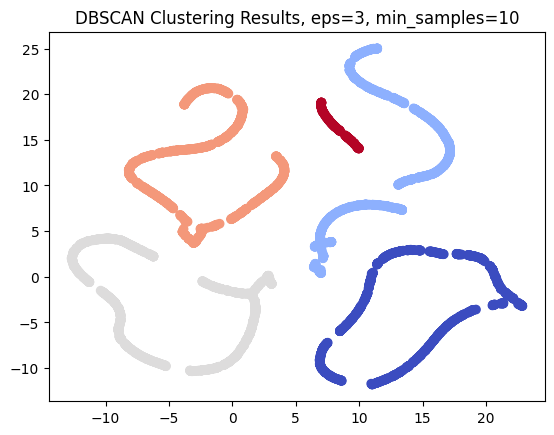

In [34]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(umap_transformed)
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=3, min_samples=10')
plt.show()

Accuracy: 0.95950

eps=3.0, min_samples=5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


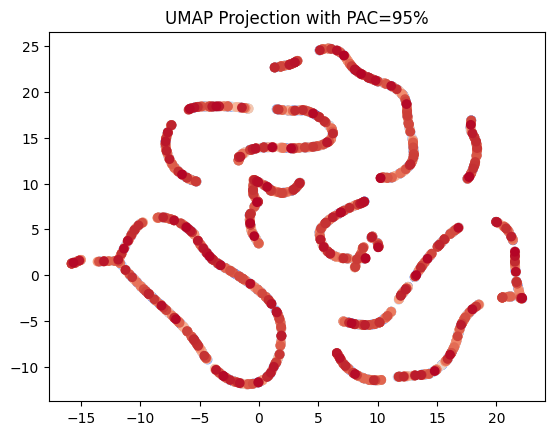

In [35]:
pca_95 = PCA(0.95).fit_transform(data_df.iloc[:, 1:])
umap_reduction_pca95 = umap.UMAP(random_state=42)
umap_results_pca95 = umap_reduction_pca95.fit_transform(pca_95)

plt.scatter(umap_results_pca95[:, 0], umap_results_pca95[:, 1], c=data_df.iloc[:, 0], cmap='coolwarm')
plt.title('UMAP Projection with PAC=95%')
plt.show()

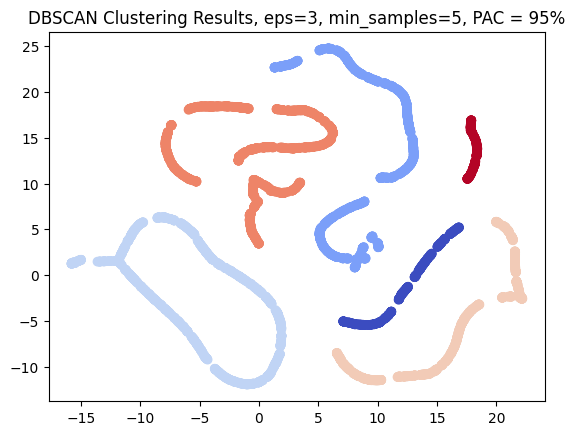

In [36]:
dbscan_cluster = DBSCAN(eps=3.0, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(umap_results_pca95)
plt.scatter(umap_results_pca95[:, 0], umap_results_pca95[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=3, min_samples=5, PAC = 95%')
plt.show()


Accuracy: 0.87650

eps=3.0, min_samples=5, PCA = 95%
(PCA seem to reduce accuracy, will remove this again)

Due to the fact that all above achived a high accuracy it might be necessary to optimizing the parameters. UMAP parameters like n_neighbors and min_dist might have a significant impact on the structure of the embedding. By adjusting these parameters, I'll try to optimize the representation of your data for clustering.
 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


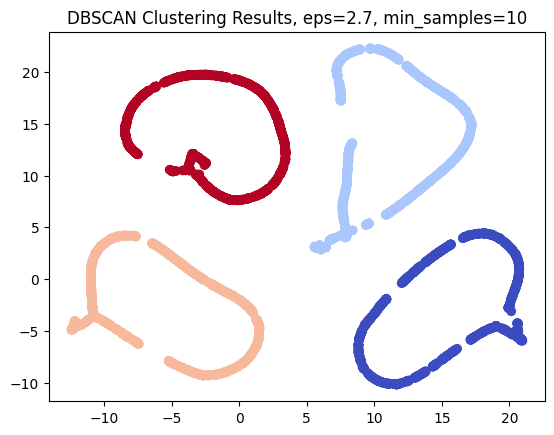

In [37]:
umap_reduced = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
umap_transformed = umap_reduced.fit_transform(data_df.iloc[:, 1:])
dbscan_cluster = DBSCAN(eps=2.7, min_samples=10)
dbscan_labels = dbscan_cluster.fit_predict(umap_transformed)
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title(f'DBSCAN Clustering Results, eps=2.7, min_samples=10')
plt.show()

dbscan_results_df = pd.DataFrame({'ID': data_df['ID'], 'cluster': dbscan_labels})
dbscan_results_df.to_csv('dbscan_submission.csv', index=False)

Finally, we reached the requested accuracy of 1.0

Accuracy: 1.00000

eps=2.7, min_samples=10

## 2a)
The UMAP method was the most effective in determining the correct number of clusters. UMAP helped in both preserving local and global structures, which was necessary for clustering with DBSCAN. PCA was used initially to reduce the dimensionality to retain 80%, 90%, and later 95% of the variance, which helped speed up clustering processes. However, UMAP captured the intrinsic structures of the data better than PCA.
- **PCA** is a linear technique that works well for reducing dimensionality and filtering out noise, but it may miss complex, non-linear relationships in the data.
- **t-SNE** is primarily useful for visualizing clusters in 2D or 3D but is not ideal for clustering algorithms like DBSCAN due to its focus on local pairwise relationships rather than global structure.
- **UMAP** is better for clustering because it preserves both the local and global structure of the data. It can project high-dimensional data into lower dimensions while maintaining the integrity of the clusters. This is why it outperformed the other techniques.

## 2b)
The DBSCAN algorithm was used for clustering. DBSCAN was chosen because it can handle clusters of arbitrary shape and detect outliers, which were important in this obfuscated dataset. The hyperparameters used were:
- **eps**: The maximum distance between two points to consider them part of the same cluster. The best-performing eps values were between 2.5 and 3.2.
- **min_samples**: The minimum number of points required to form a dense region. This did not have huge impact on the data, but values between 5 and 10 were used with sucess.

**KMeans**: This algorithm clusters data into k predefined clusters based on the centroids. However, it assumes that clusters are spherical, which is not ideal for data with irregular shapes and noise.
**DBSCAN**: It detects clusters based on density, allowing it to find clusters of arbitrary shape and identify outliers. Since the data was obfuscated, DBSCAN’s ability to handle noise and shape variability was more suitable than KMeans.


In [11]:
data_df= pd.read_csv('unsupervised_data.csv')
data_df.columns = data_df.columns.str.replace('col_', '')
data_df.columns = data_df.columns.astype(int)
data_sort_df = data_df[sorted(data_df.columns)]
data_sort_df.head()


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,0.646305,...,0.475593,0.532497,0.589401,0.627337,0.655790,0.665273,0.674758,0.665273,0.655790,0.646305
1,-0.144320,0.383794,0.633953,0.578363,0.587628,0.587628,0.587628,0.587628,0.587628,0.587628,...,0.587628,0.587628,0.587628,0.587628,0.578363,0.457915,0.068779,0.087309,0.494976,0.457915
2,0.590203,0.590203,0.590203,0.590203,0.590203,0.367673,0.345897,0.367673,0.367673,0.367673,...,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203
3,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,0.551415,...,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296,0.589296
4,0.672652,0.672655,0.672929,0.677057,0.688611,0.646499,0.409348,0.064447,-0.087393,-0.085845,...,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652,0.672652


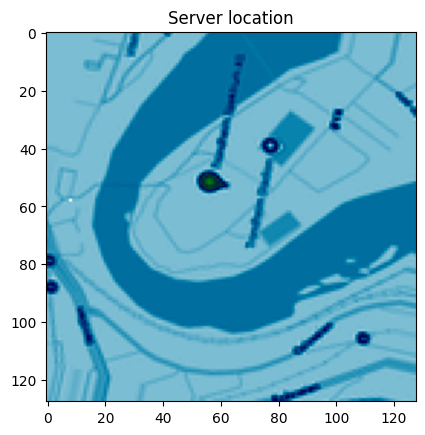

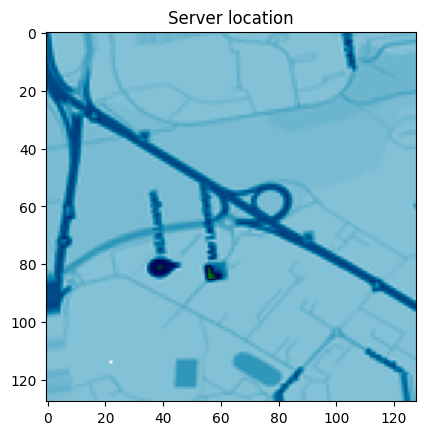

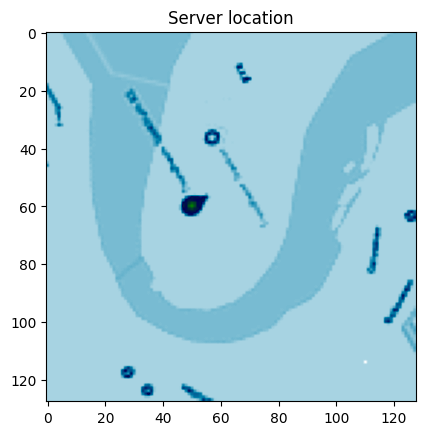

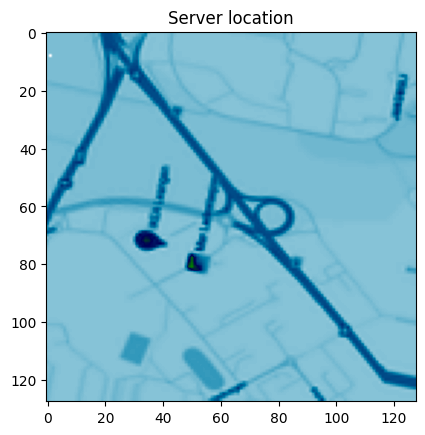

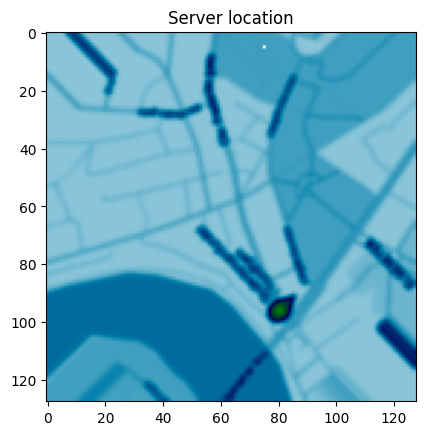

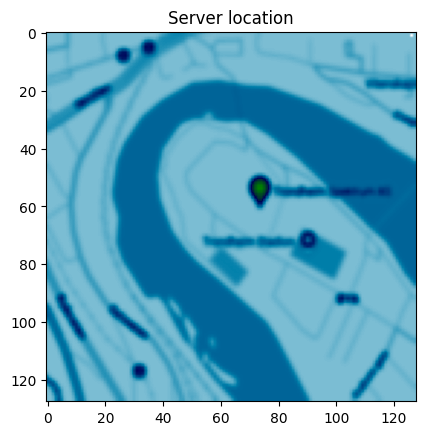

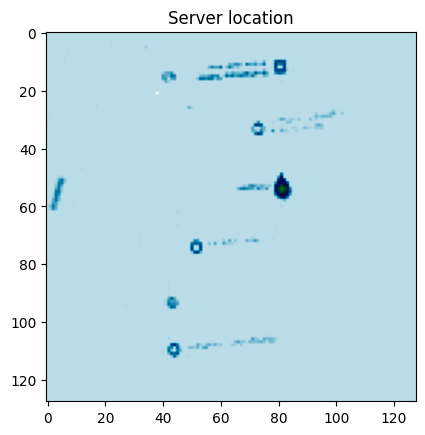

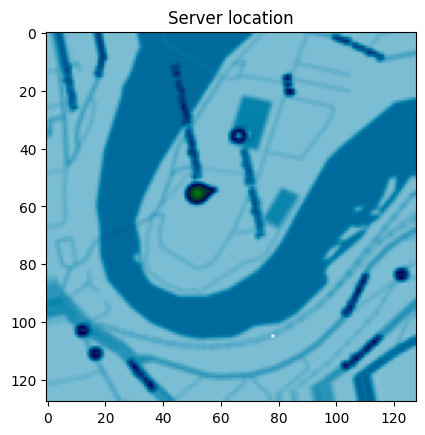

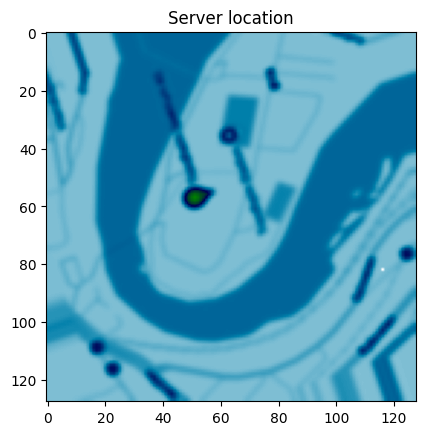

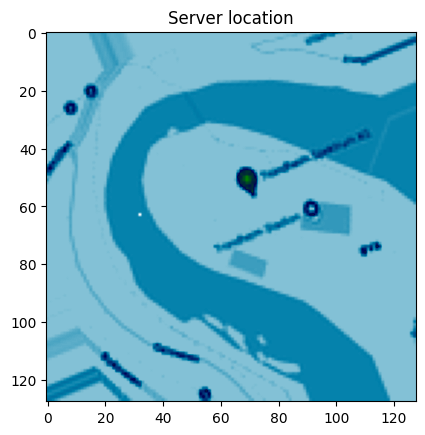

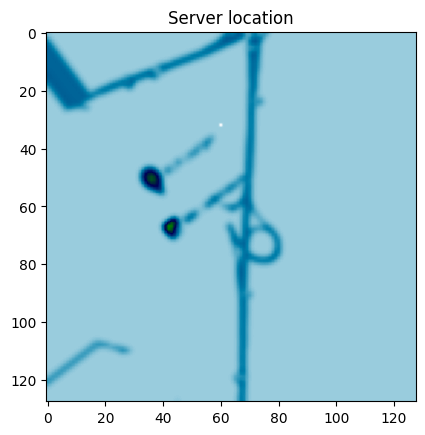

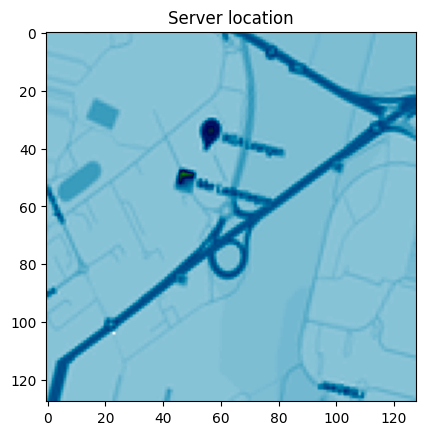

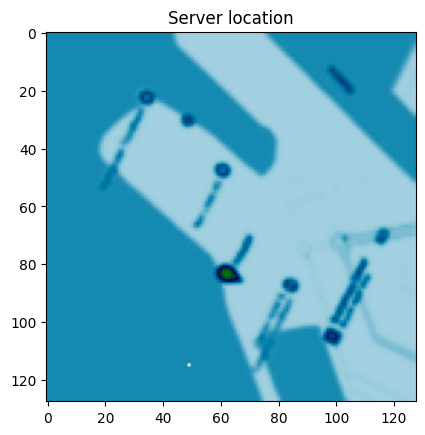

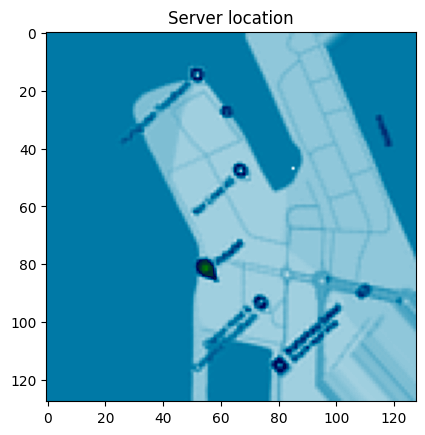

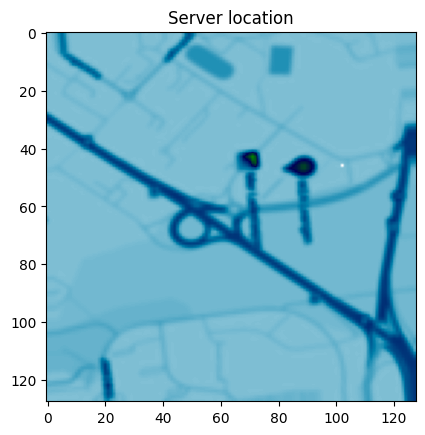

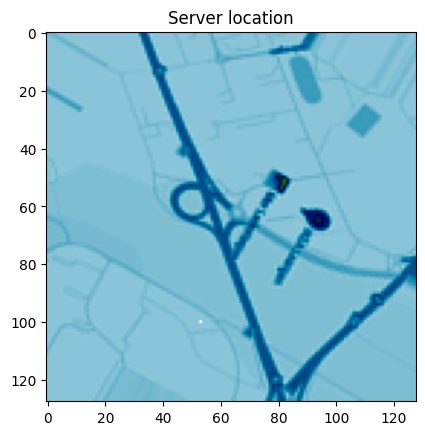

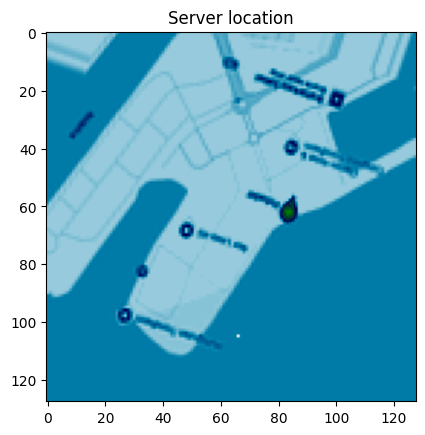

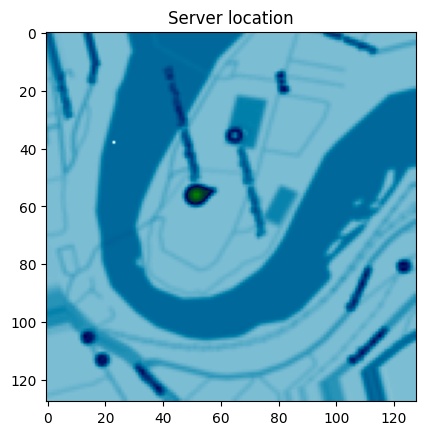

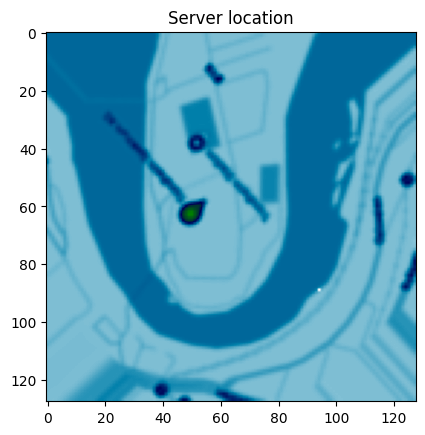

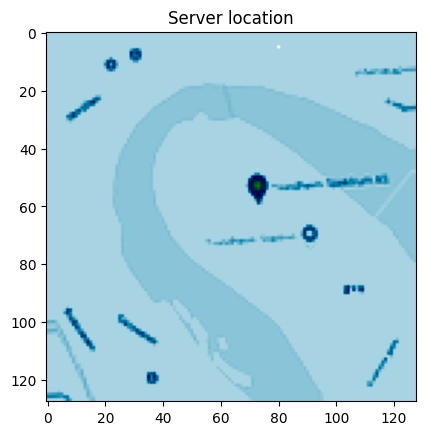

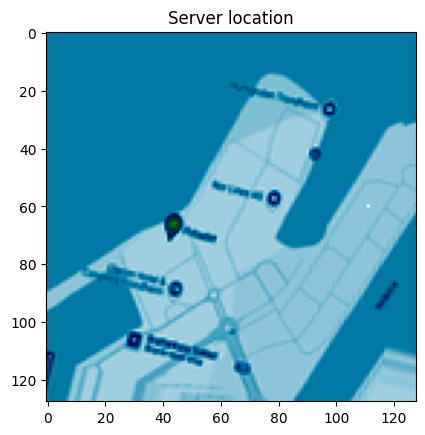

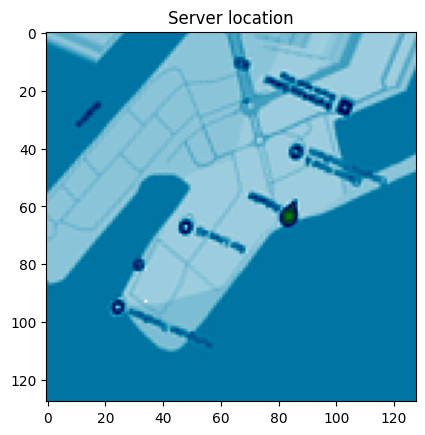

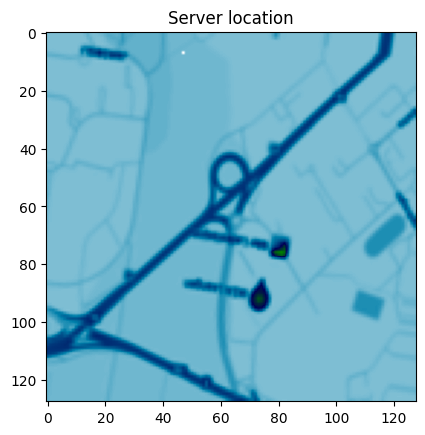

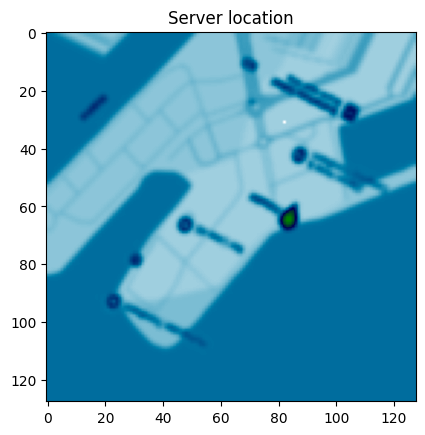

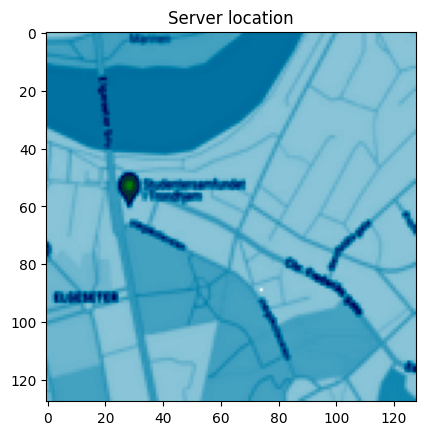

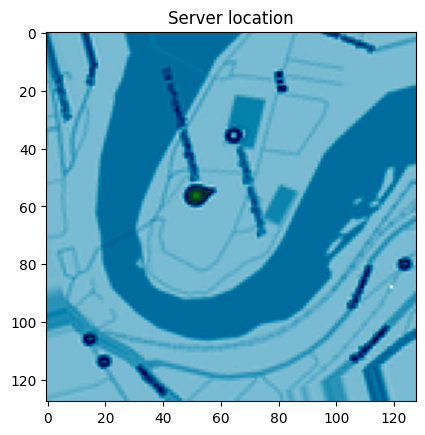

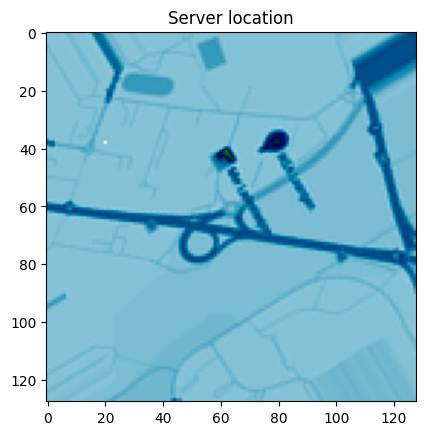

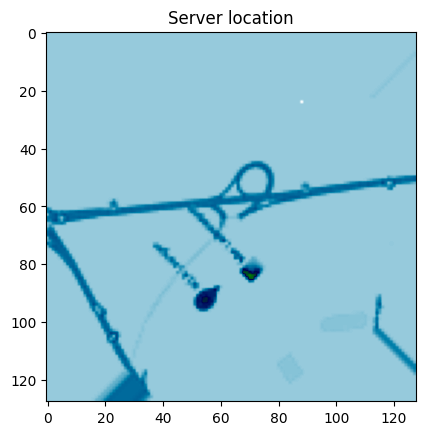

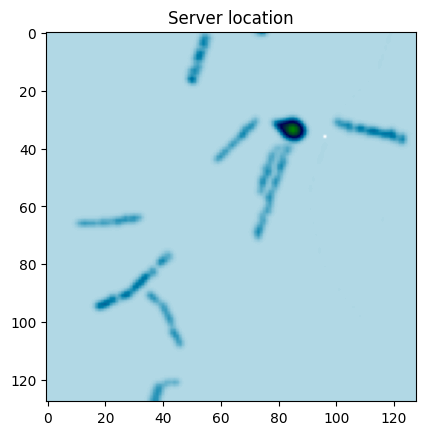

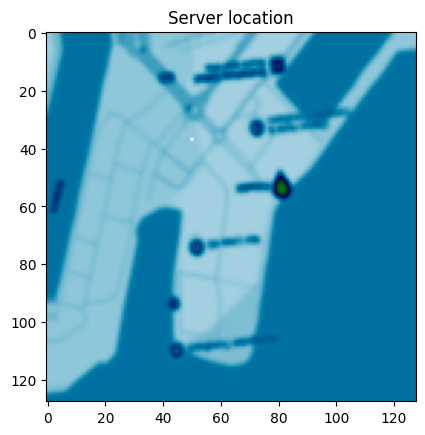

In [21]:
seen_rows = set()
counter = 0
max_iterations = 30

for _, row in data_sort_df.iterrows():
    # Convert the row to a tuple so it can be added to a set
    row_tuple = tuple(row)
    
    if row_tuple not in seen_rows:
        seen_rows.add(row_tuple)
        
        # Reshape the row (assuming each row is 128 * 128)
        reshaped_row = np.reshape(row.values, (128, 128))
        
        # Display the image of the current row
        plt.imshow(reshaped_row, cmap='ocean')
        plt.title(f'Server location')
        plt.show()
        
        counter += 1
        if counter >= max_iterations:
            break


## 2c)
After achieving 100% clustering accuracy, the clusters represent AI-compromised server locations. Based on the clustering results and combined with google maps, there are 4 servers in Trondheim. Pirbadet @ Brattørkaia, Trondheim Spektrum, Studentersamfundet and IKEA @ Leangen

## 2d)
- The hidden data type appears to represent structured, high-dimensional data, potentially obfuscated spatial information (as seen in the reshaping of data into 128x128 grids). This format suggests image-like or matrix-based data, possibly sensor readings or network traffic information.

- The data being structured and high-dimensional influenced the need for dimensionality reduction (PCA, UMAP) before clustering. PCA was initially used to reduce noise and irrelevant features, but UMAP’s non-linear approach helped uncover more complex relationships in the data.

- UMAP performed better because it can capture non-linear relationships and better preserve both local and global structures in high-dimensional spaces, which is omportant for this type of obfuscated data. PCA, being linear, was less effective because it may discard important non-linear features needed for clustering.


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [ ]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [ ]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [ ]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [ ]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5